# 4. Matplotlib-Python绘图库
本节将介绍Matplotlib库的[基本使用方法](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)，关于其他绘图需要可以参考[Matplotlib-Examples](https://matplotlib.org/stable/gallery/index.html)以及[不同类别的tutorial](https://matplotlib.org/stable/tutorials/)

Matplotlib Figure的属性可以总结为四部分：
1. Figure：图窗，包含所有坐标轴、可视化对象、以及可能的subfigure。
2. Axes：坐标区域，可以用来plot数据，通常包含2个Axis（2-D）或3个Axis（3-D）。每个坐标区域通常具有1个title、1个x轴、1个y轴。
3. Axis：单个坐标轴，用于设置scale、limits、ticks、ticklabels。
4. Artist：图窗中所有可视化对象，包含Figure、Axes、Axis、Text、Line2D、collections、Patch等

<p align=center>
<img src="./fig/4-1.png" width=600>
</p>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch

## 4.0 作图的输入类型
绘图函数一般希望numpy.array作为输入，常见的惯例是在绘图之前将不同的对象（如DataFrame, Tensor）转换为numpy.array对象，再进行作图。

关于numpy.array的操作可以参考[numpy文档](https://numpy.org/doc/stable/user/quickstart.html)

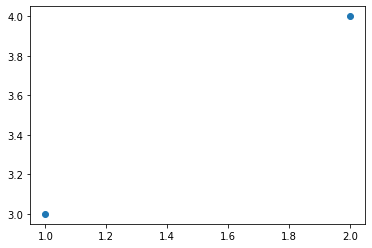

In [3]:
# Transform to np.array first
a = np.matrix([[1,2], [3,4]])
a_array = np.asarray(a) # convert input to an array, including lists, tuples, ndarrays, etc.
# Plot
plt.scatter(a_array[0,:], a_array[1,:])

目前tensor也支持直接使用matplotlib进行plot，直接plot若没遇到问题就可直接使用。

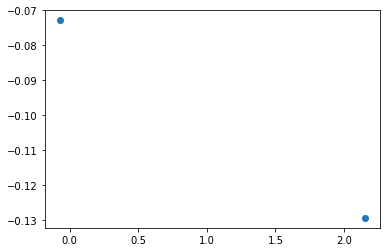

In [4]:
b = torch.randn([2,2])
plt.scatter(b[0,:], b[1,:])

此外，Matplotlib还可以通过给x和y变量提供data关键字来绘图

Text(0, 0.5, 'entry b')

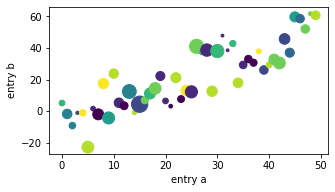

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 10, 50),
        's': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['s'] = np.abs(data['s']) * 100

fig, ax = plt.subplots(figsize = (5, 2.7))
ax.scatter('a', 'b', c='c', s='s', data=data) # c-color, s-marker size
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## 4.1 代码风格
Matplotlib支持两种代码风格：
+ 面向对象风格：显式地创建Figure和Axes对象，并调用函数on them
+ Pyplot自动风格：利用pyplot自动创建和管理Figure/Axes对象，并利用pyplot函数来作图

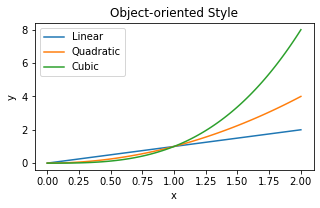

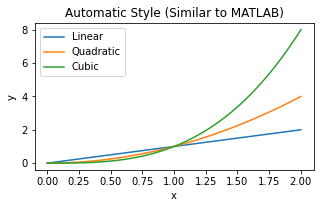

In [6]:
x = np.linspace(0, 2, 100)

# Object-oriented style
fig, ax = plt.subplots(figsize = (5, 2.7))
ax.plot(x, x, label = 'Linear')
ax.plot(x, x**2, label = 'Quadratic')
ax.plot(x, x**3, label = 'Cubic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Object-oriented Style')
ax.legend()

# Pyplot automatical style
plt.figure(figsize = (5, 2.7))
plt.plot(x, x, label = 'Linear')
plt.plot(x, x**2, label = 'Quadratic')
plt.plot(x, x**3, label = 'Cubic')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Automatic Style (Similar to MATLAB)')
plt.legend()

## 4.2 自定义作图函数（Object-oriented style Recommended）
自定义作图函数，实现复用同一作图框架的用途。关于`*, **`操作符可以参考[Python中的*与**完全详解](https://blog.csdn.net/zkk9527/article/details/88675129)

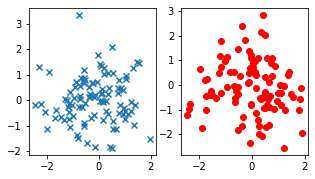

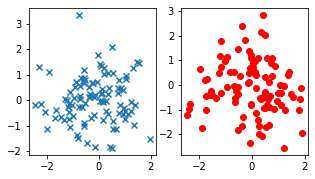

In [7]:
data1 = np.random.randn(2, 100)
data2 = np.random.randn(2, 100)

# Object-oriented style
def CHJ_plot(ax, data, param_dict):
    # param_dict refers to a dictionary containing the user-defined parameters
    return ax.scatter(data[0, :], data[1, :], **param_dict)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5, 2.7))
CHJ_plot(ax1, data1, {'marker':'x'})
CHJ_plot(ax2, data2, {'color':'r'})

# Pyplot automatical style
def CHJ_plot(data, param_dict):
    return plt.scatter(data[0, :], data[1, :], **param_dict)
plt.figure(figsize=(5, 2.7))
plt.subplot(1,2,1)
CHJ_plot(data1, {'marker':'x'})
plt.subplot(1,2,2)
CHJ_plot(data2, {'color':'r'})

## 4.3 自定义Artist风格
本节给出绘图中的[Color](https://matplotlib.org/stable/tutorials/colors/colors.html), Linewidth, [Linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), Markersize, [MarkerStyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)等Artist的自定义方式。

+  Artist Style既可以通过plot中设置，又可以在plot以后通过set来设置

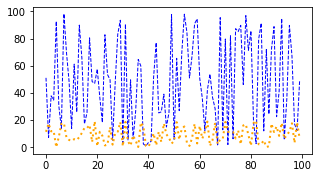

In [8]:
# Two ways to set the artists styles
data1 = 100 * np.random.rand(100)
data2 = 20 * np.random.rand(100)
fig, ax = plt.subplots(figsize=(5, 2.7))
# 1. Ploting
ax.plot(np.arange(len(data1)), data1, color = 'blue', linewidth = 1, linestyle = '--')
# 2. Setting
l, = ax.plot(np.arange(len(data2)), data2) # comma is necessary to generate a Line2D object
l.set_color('orange')
l.set_linewidth(2)
l.set_linestyle(':')

+ Scatter的colors包含edgecolor和facecolor

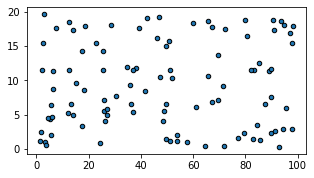

In [9]:
fig, ax = plt.subplots(figsize = (5, 2.7))
ax.scatter(data1, data2, s=20, facecolor='C0', edgecolor='k')

+ Markerstyle可以自定义调整

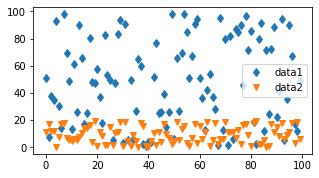

In [10]:
fig, ax = plt.subplots(figsize = (5, 2.7))
ax.plot(data1, 'd', label = 'data1')
ax.plot(data2, 'v', label = 'data2')
ax.legend()

## 4.4 标签绘制
标签包含 坐标轴标签（Axes lables）、文字说明（Text）、注释（Annotations）、图例（legends）等，下面通过一个程序来说明如何绘制这些标签

关于legends的位置可以参考[调整matplotlib的图例legend的位置](https://blog.csdn.net/Yangchenju/article/details/108006248)

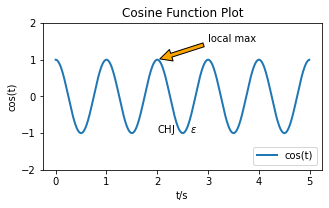

In [11]:
t = np.arange(0, 5, 0.01)
s = np.cos(2 * np.pi * t)

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(t, s, linewidth = 2, label = 'cos(t)')

# Axes lables
ax.set_xlabel('t/s')
ax.set_ylabel('cos(t)')
ax.set_title('Cosine Function Plot')

# Text
ax.text(2,-1,'CHJ     $\epsilon$') # position: x=2, y=-1

# Annotations
ax.annotate('local max', xy=(2,1), xytext=(3, 1.5), arrowprops= dict(facecolor = 'orange', shrink=0.05)) # annotate position:(2,1), text position:(3, 1.5)
ax.set_ylim(-2, 2)

# Legends
ax.legend(loc = 4)

## 4.5 坐标轴的 尺度Scale 和 刻度Tick
每个坐标轴Axes通常都有2个Axis轴对象（2-D），可以通过改变Axis的尺度、刻度位置与格式，甚至增加新的Axis轴对象，来进一步自定义地完善图例。

+ 坐标轴尺度变换（Axis Scales）：有线性变换、非线性变换.

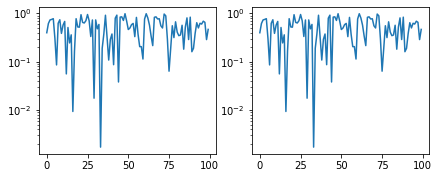

In [12]:
data = np.random.rand(100)
xdata = np.arange(len(data))
fig, axs = plt.subplots(1, 2, figsize=(7, 2.7))

# log scale
axs[0].plot(xdata, data)
axs[0].set_yscale('log')

# log scale, another expression
axs[1].semilogy(xdata, data)

+ 刻度位置与格式（Tick locators and formatters）：可以调整刻度的位置，和刻度显示的内容

<BarContainer object of 4 artists>

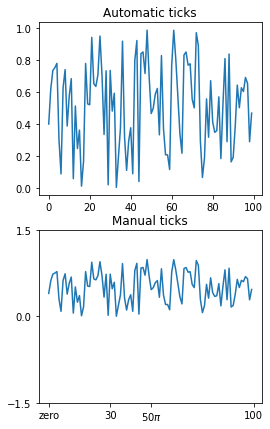

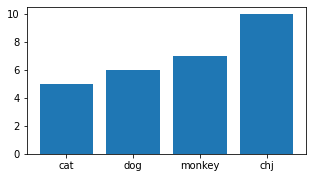

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(4, 7))
axs[0].plot(xdata, data)
axs[0].set_title('Automatic ticks')

# Change tick locators and formatters
axs[1].plot(xdata, data)
axs[1].set_xticks([0, 30, 50, 100])
axs[1].set_xticklabels(['zero', '30', '50$\pi$', '100'])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks')

# Similarly for Bar
fig, ax = plt.subplots(figsize=(5, 2.7))
cate = ['cat', 'dog', 'monkey', 'chj']
ax.bar(cate, [5, 6, 7, 10])

+ 额外的轴对象（Additional Axis Objects）：可以在同一张图画出不同的轴对象

Text(0.5, 0, 'degree')

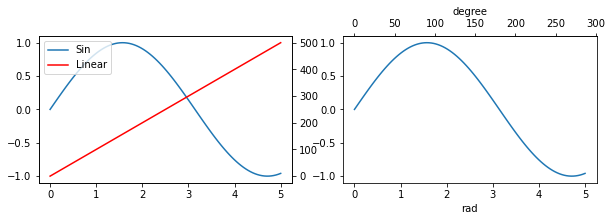

In [23]:
t = np.linspace(0, 5, 100)
s = np.sin(t)
y = 100*t
fig, axs = plt.subplots(1, 2, figsize=(10, 2.7))
# Left: Sin, Right: Linear
l1, = axs[0].plot(t, s)
ax2 = axs[0].twinx() # create another ax2 with the same x axis.
l2, = ax2.plot(t, y,c='r')
ax2.legend([l1, l2], ['Sin', 'Linear'])

# Up: Degree, Down: Rad
axs[1].plot(t, s)
axs[1].set_xlabel('rad')
ax3 = axs[1].secondary_xaxis('top', functions = (np.rad2deg, np.deg2rad)) # original->now, and its inverse transform
ax3.set_xlabel('degree')

## 4.6 Color Map的四种风格
对于3维数据，可以通过color map来描绘，Matplotlib有很多种实现方式

/var/folders/fw/by0ngc4j67x7597xgdhn13xr0000gn/T/ipykernel_18117/3613736624.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r') # colormap = RDBU_r, from v_min to v_max


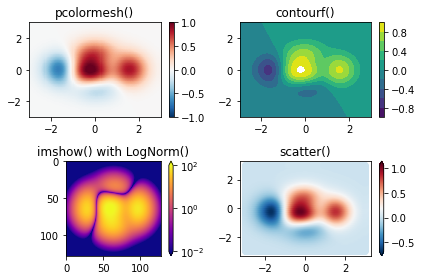

In [30]:
# Create color map data
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# Show Color Map Plot for 4 different styles
fig, axs = plt.subplots(2, 2)

# (1,1): pcolormesh()
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r') # colormap = RDBU_r, from v_min to v_max
fig.colorbar(pc, ax = axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

# (1,2): contourf()
co = axs[0, 1].contourf(X, Y, Z, levels = np.linspace(-1, 1, 11))
fig.colorbar(co, ax = axs[0,1])
axs[0, 1].set_title('contourf()')

# (2,1): imshow() with LogNorm()
pc = axs[1, 0].imshow(100*Z**2, cmap='plasma', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax = axs[1,0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

# (2,2): scatter()
pc = axs[1, 1].scatter(X, Y, c = Z, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1,1], extend='both')
axs[1, 1].set_title('scatter()')

plt.tight_layout() # Avoid overlap between subplots

## 4.7 自定义Multiple Figures and Axes的布局
可以通过subplot_mosaic()来实现复杂的多子图布局

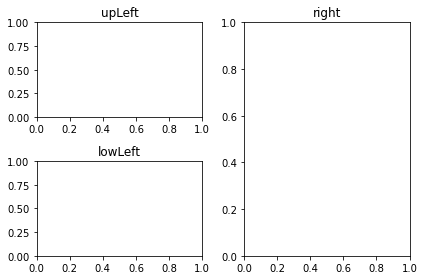

In [32]:
fig, ax = plt.subplot_mosaic([['upLeft-1', 'right-2'],
                              ['lowLeft-3', 'right-2']])
ax['upLeft-1'].set_title('upLeft')
ax['lowLeft-3'].set_title('lowLeft')
ax['right-2'].set_title('right')
fig.tight_layout()